In [127]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [128]:
#Import data
df = pd.read_csv('output/clean_dataset.csv')
epsilon = 1e-10  # small value to add to prevent 0 values from creating error when deriving natural log

In [129]:
#Set X and Y values for regression
Y = np.log(df['Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'] + epsilon)
X = np.log(df[['Prod_Merc_Positions_Long_ALL', 'Prod_Merc_Positions_Short_ALL', 'M_Money_Positions_Long_ALL', 'M_Money_Positions_Short_ALL']] + epsilon)

In [130]:
#Conduct regression
model = sm.OLS(Y, sm.add_constant(X))
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                OLS Regression Results                                                
======================================================================================================================
Dep. Variable:     Henry Hub Natural Gas Spot Price (Dollars per Million Btu)   R-squared:                       0.171
Model:                                                                    OLS   Adj. R-squared:                  0.148
Method:                                                         Least Squares   F-statistic:                     7.340
Date:                                                        Mon, 22 Apr 2024   Prob (F-statistic):           2.11e-05
Time:                                                                13:49:27   Log-Likelihood:                -33.876
No. Observations:                                                         147   AIC:                             77.75
Df Residuals:                                                             142   BIC:                             92.70
Df Model:                                                                   4                                         
Covariance Type:                                                    nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.0624      0.357      0.175      0.861      -0.642       0.767
Prod_Merc_Positions_Long_ALL      0.1440      0.085      1.697      0.092      -0.024       0.312
Prod_Merc_Positions_Short_ALL    -0.1862      0.102     -1.817      0.071      -0.389       0.016
M_Money_Positions_Long_ALL        0.1515      0.031      4.895      0.000       0.090       0.213
M_Money_Positions_Short_ALL      -0.0092      0.009     -1.046      0.297      -0.027       0.008
==============================================================================
Omnibus:                        2.009   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.366   Jarque-Bera (JB):                2.070
Skew:                           0.256   Prob(JB):                        0.355
Kurtosis:                       2.723   Cond. No.                         284.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

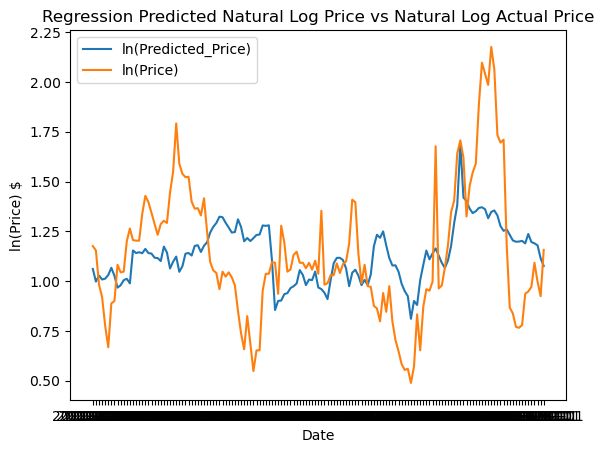

In [123]:
#Derive predicted values from model and plot against actual
predicted_values = fit.predict(sm.add_constant(X))
plt.plot(df['Date'], predicted_values, label = 'ln(Predicted_Price)')
plt.plot(df['Date'], np.log(df['Henry Hub Natural Gas Spot Price (Dollars per Million Btu)']), label = 'ln(Price)')

plt.xlabel('Date')
plt.ylabel('ln(Price) $')
plt.title('Regression Predicted Natural Log Price vs Natural Log Actual Price')
plt.legend()
plt.show()

In [124]:
#Set X and Y values for regression
Y = np.log(df['Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'] + epsilon)
X = np.log(df[['Prod_Merc_Positions_Long_ALL', 'Prod_Merc_Positions_Short_ALL', 'M_Money_Positions_Long_ALL', 'M_Money_Positions_Short_ALL', 'Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet)', 'U.S. Natural Gas Marketed Production (MMcf)','U.S. Natural Gas Total Consumption (MMcf)', 'U.S. Natural Gas Exports (MMcf)', 'U.S. Natural Gas Imports (MMcf)', 'POPTHM', 'Monthly Real GDP Index' ]] + epsilon)

In [125]:
#Conduct regression
model = sm.OLS(Y, sm.add_constant(X))
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                OLS Regression Results                                                
======================================================================================================================
Dep. Variable:     Henry Hub Natural Gas Spot Price (Dollars per Million Btu)   R-squared:                       0.326
Model:                                                                    OLS   Adj. R-squared:                  0.271
Method:                                                         Least Squares   F-statistic:                     5.929
Date:                                                        Mon, 22 Apr 2024   Prob (F-statistic):           8.04e-08
Time:                                                                13:41:44   Log-Likelihood:                -18.719
No. Observations:                                                         147   AIC:                             61.44
Df Residuals:                                                             135   BIC:                             97.32
Df Model:                                                                  11                                         
Covariance Type:                                                    nonrobust                                         
=======================================================================================================================================================
                                                                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                 246.3566     82.586      2.983      0.003      83.026     409.687
Prod_Merc_Positions_Long_ALL                                                            0.0956      0.106      0.905      0.367      -0.113       0.305
Prod_Merc_Positions_Short_ALL                                                           0.0059      0.117      0.051      0.960      -0.225       0.237
M_Money_Positions_Long_ALL                                                              0.0967      0.036      2.665      0.009       0.025       0.168
M_Money_Positions_Short_ALL                                                            -0.0172      0.009     -1.910      0.058      -0.035       0.001
Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet)    -0.2243      0.082     -2.731      0.007      -0.387      -0.062
U.S. Natural Gas Marketed Production (MMcf)                                            -0.2467      0.543     -0.454      0.650      -1.321       0.827
U.S. Natural Gas Total Consumption (MMcf)                                              -0.3405      0.223     -1.529      0.129      -0.781       0.100
U.S. Natural Gas Exports (MMcf)                                                         0.2982      0.185      1.615      0.109      -0.067       0.663
U.S. Natural Gas Imports (MMcf)                                                         0.7602      0.366      2.079      0.040       0.037       1.483
POPTHM                                                                                -22.3489      7.291     -3.065      0.003     -36.769      -7.929
Monthly Real GDP Index                                                                  3.4175      1.595      2.143      0.034       0.264       6.571
==============================================================================
Omnibus:                        8.433   Durbin-Watson:                   0.418
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.209
Skew:                           0.543   Prob(JB):                       0.0165
Kurtosis:                       3.403   Cond. N

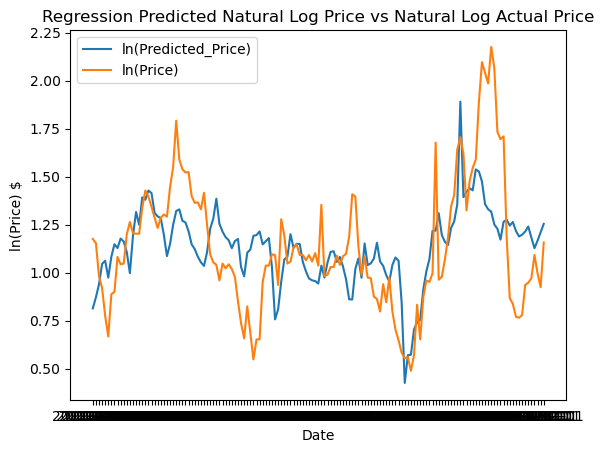

In [126]:
#Derive predicted values from model and plot against actual
predicted_values = fit.predict(sm.add_constant(X))
plt.plot(df['Date'], predicted_values, label = 'ln(Predicted_Price)')
plt.plot(df['Date'], np.log(df['Henry Hub Natural Gas Spot Price (Dollars per Million Btu)']), label = 'ln(Price)')

plt.xlabel('Date')
plt.ylabel('ln(Price) $')
plt.title('Regression Predicted Natural Log Price vs Natural Log Actual Price')
plt.legend()
plt.show()